In [2]:
#!pip install --upgrade pip
!pip install pyathena

  Using cached pyathena-3.3.0-py3-none-any.whl.metadata (86 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
Using cached pyathena-3.3.0-py3-none-any.whl (80 kB)
Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.4 which is incompatible.
sagemaker 2.199.0 requires urllib3<1.27, but you have urllib3 2.0.7 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2

  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# Taigo datos de tablas que arme yo y de receiver

In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name1 = 'viamericas'
database_name2 = 'analytics'
tabla1 = 'tb2_fraud_jp'
tabla2 = 'tb_fraud_jp'
tabla3 = 'receiver'

In [6]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)
df_hora = pd.read_sql(f'SELECT	hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY hour(DATE_RECEIVER);', conn)
df_dia = pd.read_sql(f'SELECT	day_of_week(DATE_RECEIVER) dia, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY day_of_week(DATE_RECEIVER);', conn)


/tmp/ipykernel_3128/3152341669.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
/tmp/ipykernel_3128/3152341669.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)
/tmp/ipykernel_3128/3152341669.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hora = pd.read_sql(f'SELECT	hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3

In [11]:
print(sns.__version__)

0.12.2


In [8]:
df1.head()

,date_receiver,id_receiver,id_branch,fraud_type,id_sender,id_country_receiver,id_payment,id_state_receiver,id_city_receiver,bank_receiver,score,was_fraud,date_created,date_processed
0,2023-01-05 18:48:11.910,771.0,A22162,REMOTE ACCESS,236.0,NIC,C,NIC9,NIC91,,0.000000,False,2023-01-05 18:48:12.847,2023-12-20 18:25:04.870
1,2023-01-10 14:48:58.217,356.0,A23081,REMOTE ACCESS,100.0,PER,C,PER01,PER02,,0.000000,False,2023-01-10 14:48:58.920,2023-12-20 08:56:07.783
2,2023-01-12 17:23:03.020,1663.0,A22856,REMOTE ACCESS,479.0,MEX,C,MEX45,ME453,,0.000003,False,2023-01-12 17:23:03.510,2023-12-20 05:56:06.210
3,2023-02-09 15:36:25.763,2317.0,A21772,PAYMENT,944.0,MEX,C,MEX26,ME176,,0.994501,True,2023-02-09 15:36:26.450,2023-12-13 05:48:00.463
4,2023-02-24 15:22:33.870,9013.0,A20393,PAYMENT,2806.0,MEX,C,MEX33,ME196,,0.988383,True,2023-02-24 15:22:34.637,2023-12-11 21:41:06.410


In [7]:
# Miro cuantos fraudes hay
df2.was_fraud.value_counts()

was_fraud
True     556
False    195
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='fraud_type', ylabel='Count'>

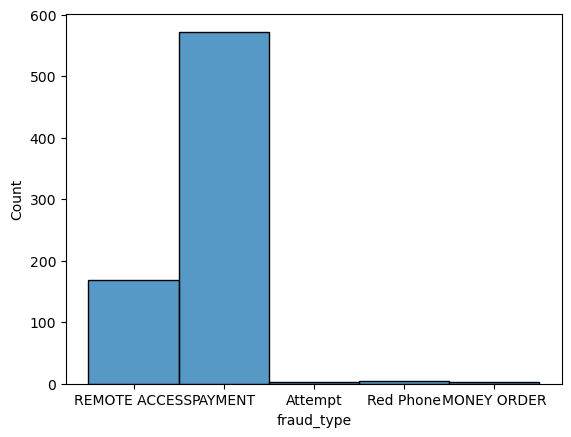

In [12]:
# Histograma de tipos de fraudes
sns.histplot(data=df1, x="fraud_type")

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


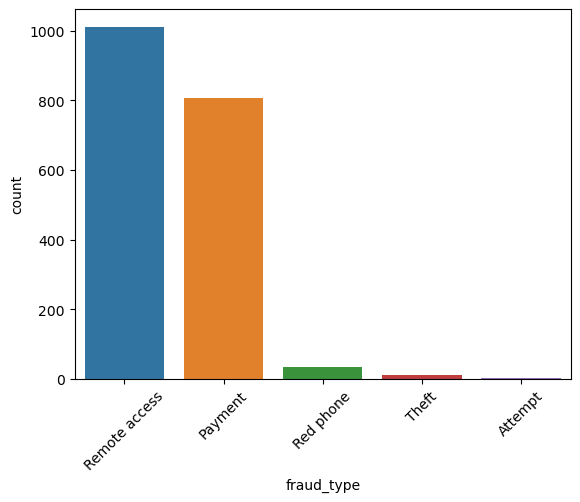

In [66]:
df1['fraud_type'] = df1['fraud_type'].str.capitalize()
sns.countplot(data=df1, x = 'fraud_type')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


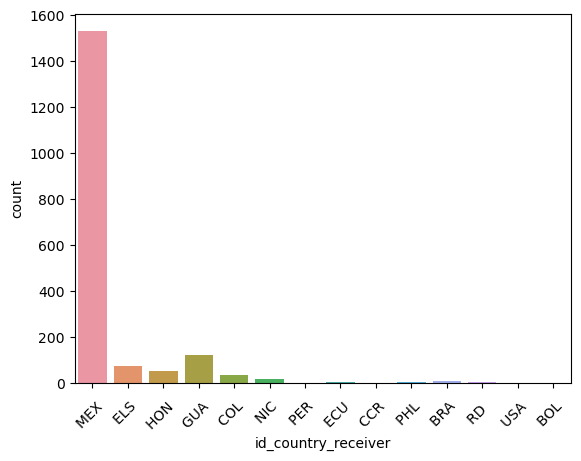

In [57]:
# Apretura por pais de Receiver
sns.countplot(data=df1, x = 'id_country_receiver')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


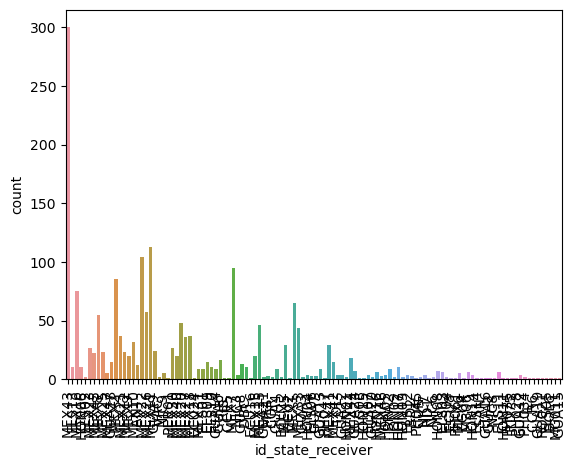

In [21]:
sns.countplot(data=df1, x = 'id_state_receiver')
plt.xticks(rotation=90);

In [43]:
df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])
df1['dia_semana'] = df1['date_receiver'].dt.weekday
df1['dia_semana'] = np.fix(df1['dia_semana'])
df1['dia_semana'] = df1['dia_semana'].fillna(-1).astype(int)
#0:Lunes, 1: Martes
#Como Dia es 1:Monday, 2:Martes,... resto uno para q queden en los mismo
df_dia['dia'] = df_dia['dia']-1

df1['hora'] =  df1['date_receiver'].dt.hour
df1['hora'] = np.fix(df1['hora'])
df1['hora'] = df1['hora'].fillna(-1).astype(int)


/tmp/ipykernel_20/2710726617.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])
/tmp/ipykernel_20/2710726617.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaT' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])


In [49]:
sum(df1['hora']<0)

0

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia_semana', ylabel='count'>

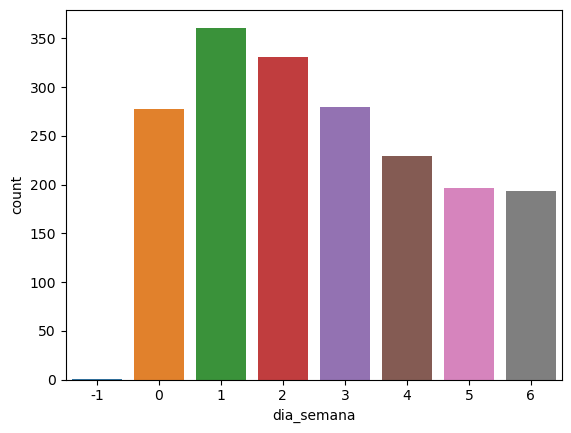

In [51]:
sns.countplot(data=df1, x = 'dia_semana')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='count'>

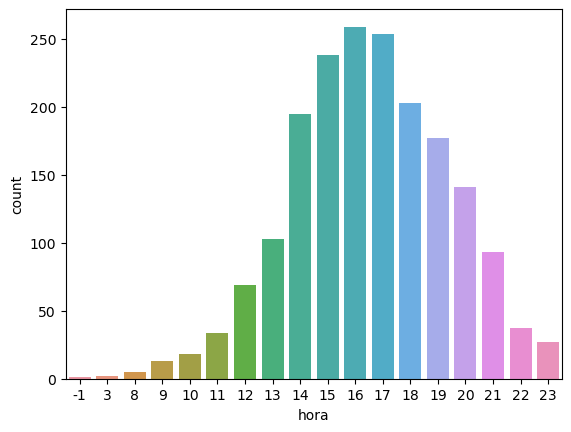

In [40]:
sns.countplot(data=df1, x = 'hora')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='cant'>

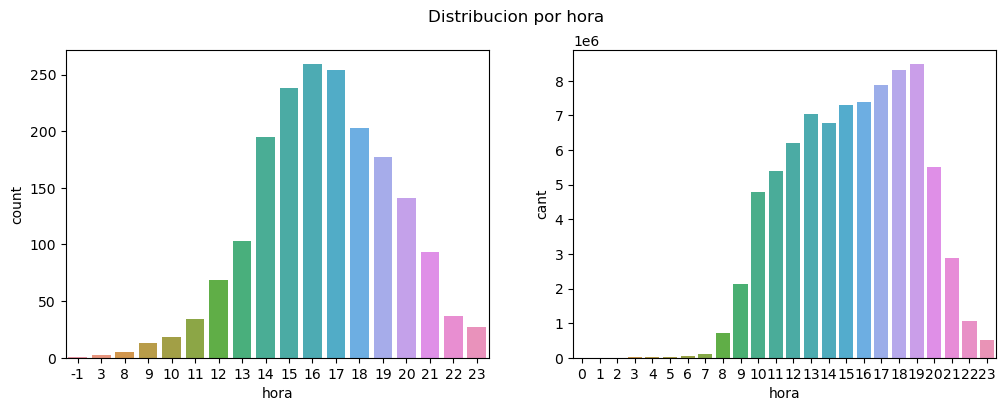

In [41]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data = df1, x = 'hora', ax = axs[0])
sns.barplot(data = df_hora, x ='hora', y = 'cant', ax = axs[1])


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia', ylabel='cant'>

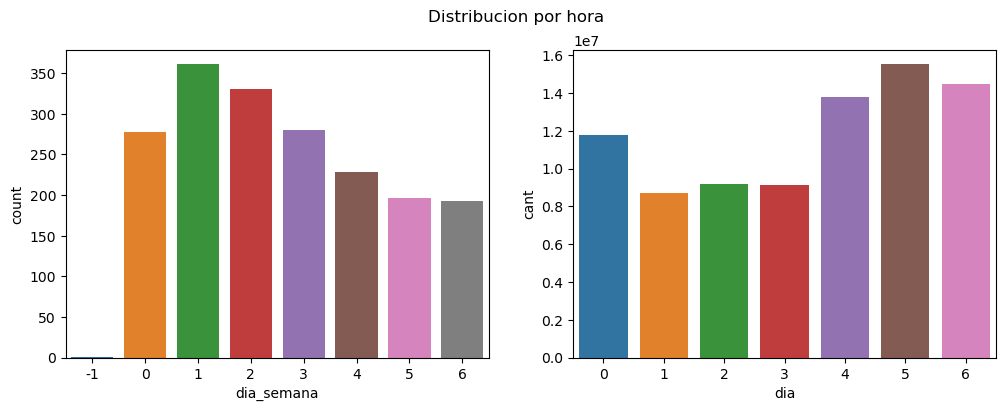

In [52]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data=df1, x = 'dia_semana', ax = axs[0])
sns.barplot(data = df_dia, x ='dia', y = 'cant', ax = axs[1])
#Dia_semana con 0:Lunes, 1: Martes

In [18]:
df1['hora'].value_counts()

hora
16.0    259
17.0    254
15.0    238
18.0    203
14.0    195
19.0    177
20.0    141
13.0    103
21.0     93
12.0     69
22.0     37
11.0     34
23.0     27
10.0     18
9.0      13
8.0       5
3.0       2
Name: count, dtype: int64

In [54]:
df1.id_payment.value_counts()


id_payment
C     1868
Name: count, dtype: int64

# Distribucion de las variables para estandarizar

In [7]:
tablaVec = 'fraud_vectors_v2_1'

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df_vectores = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name1}.{tablaVec} limit 100000;', conn)

#sender_minutes_since_last_transaction, net_amount_receiver, sender_days_to_last_transaction, sender_sending_days

/tmp/ipykernel_21/2601691413.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vectores = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name1}.{tablaVec} limit 100000;', conn)


In [8]:
df_vectores_sample = df_vectores.sample(n=30000)

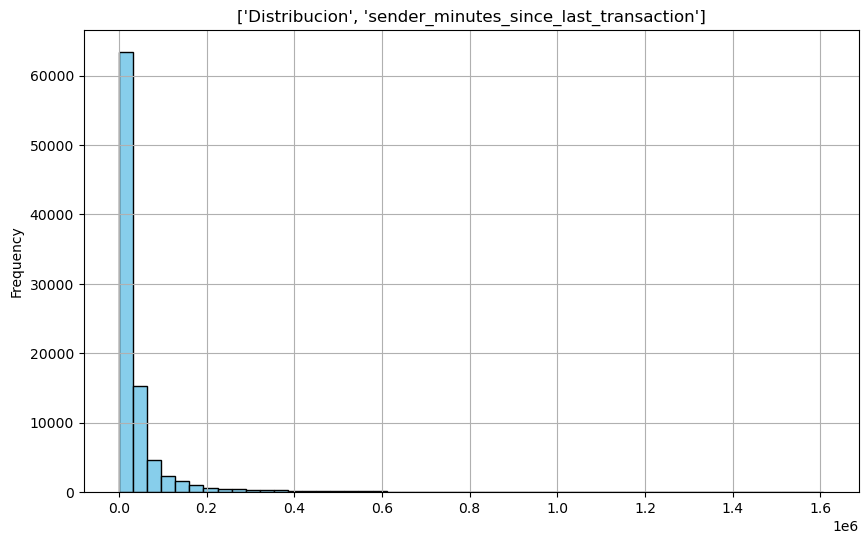

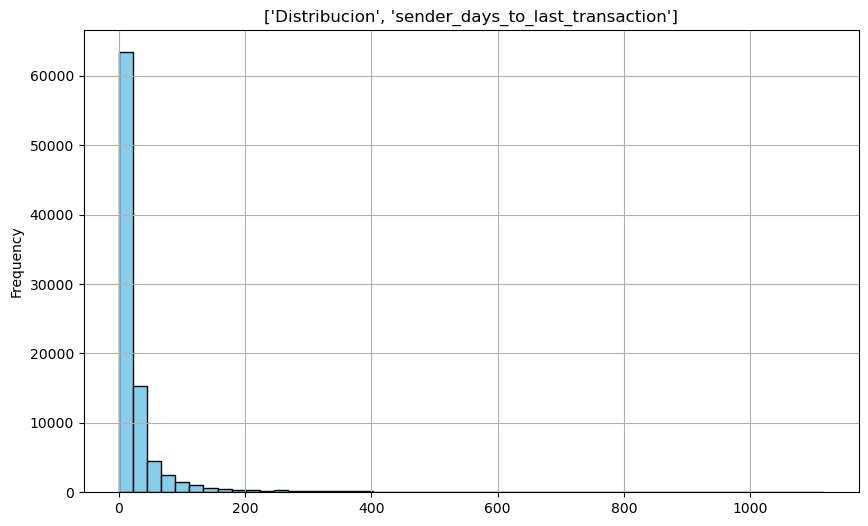

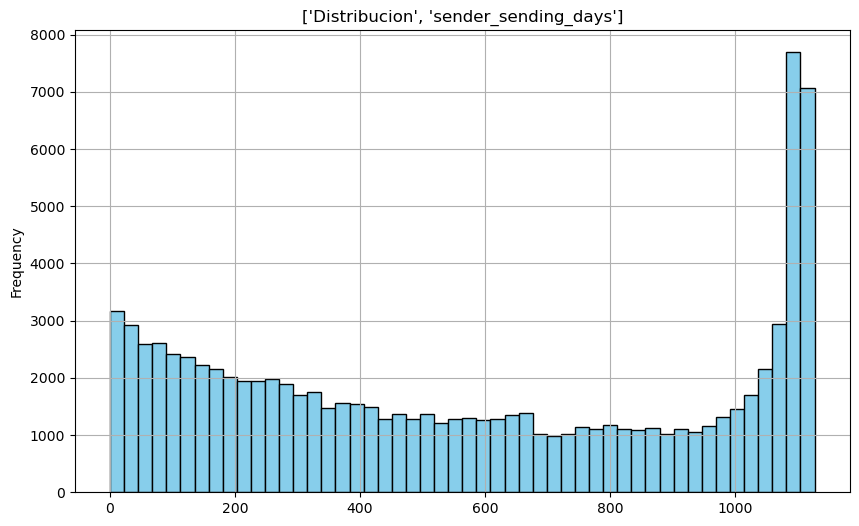

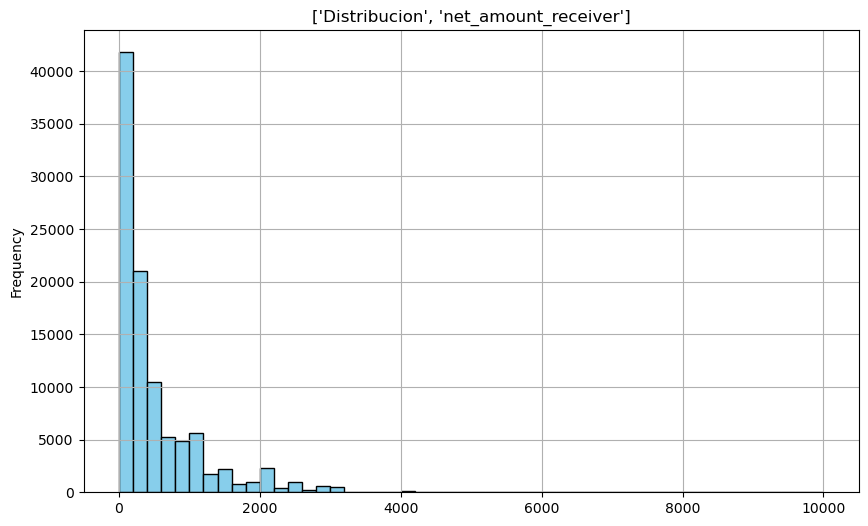

In [21]:
vars = ['sender_minutes_since_last_transaction','sender_days_to_last_transaction','sender_sending_days','net_amount_receiver']
for var in vars:
    plt.figure(figsize = (10,6))
    plt.hist(df_vectores[var], bins=50, color='skyblue', edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(['Distribucion', var])
    plt.grid(True)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

<AxesSubplot:xlabel='weekday_1', ylabel='sender_minutes_since_last_transaction'>

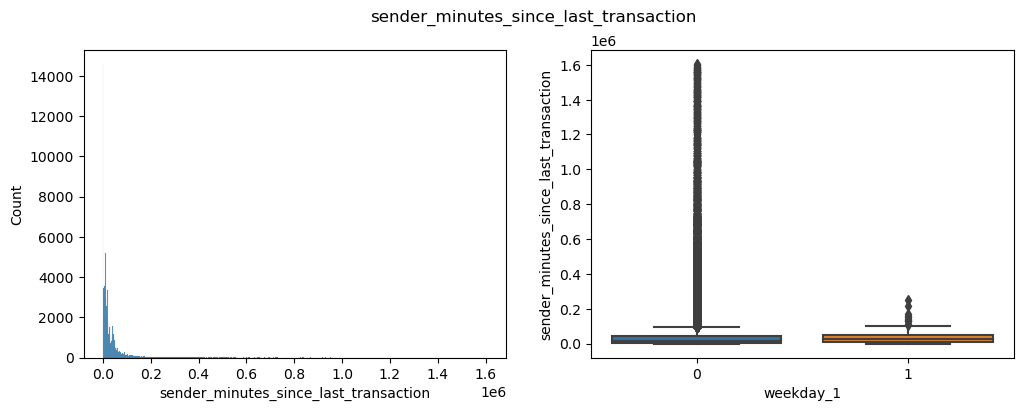

In [22]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('sender_minutes_since_last_transaction')
sns.histplot(data=df_vectores, x="sender_minutes_since_last_transaction", ax = axs[0])
sns.boxplot(data = df_vectores, x ='weekday_1', y = 'sender_minutes_since_last_transaction', ax = axs[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='sender_days_to_last_transaction', ylabel='Count'>

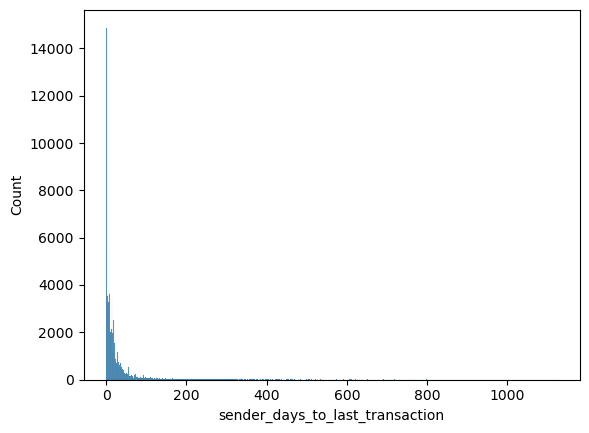

In [11]:
sns.histplot(data=df_vectores, x="sender_days_to_last_transaction")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='sender_sending_days', ylabel='Count'>

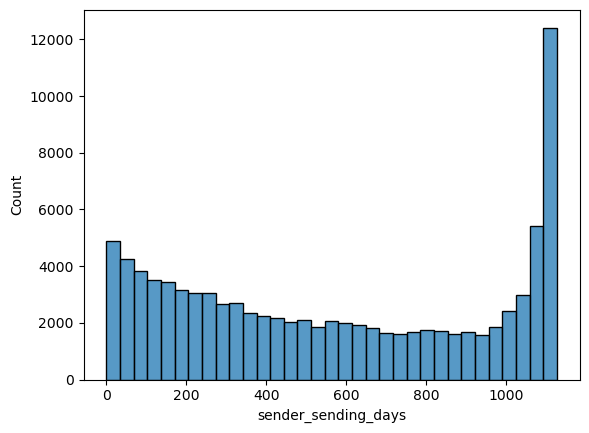

In [12]:
sns.histplot(data=df_vectores, x="sender_sending_days")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='net_amount_receiver', ylabel='Count'>

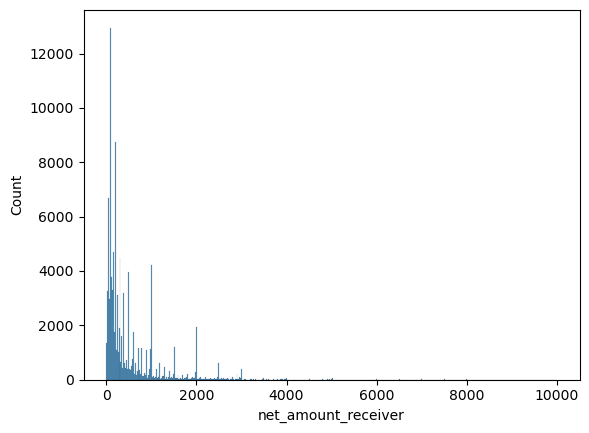

In [13]:
sns.histplot(data=df_vectores, x="net_amount_receiver")

In [ ]:
sender_minutes_since_last_transaction
net_amount_receiver
sender_days_to_last_transaction
sender_sending_days